# <h1><u><b><font color=orange>              Aerofit Business Case Study on Treadmills</b></u></h1>

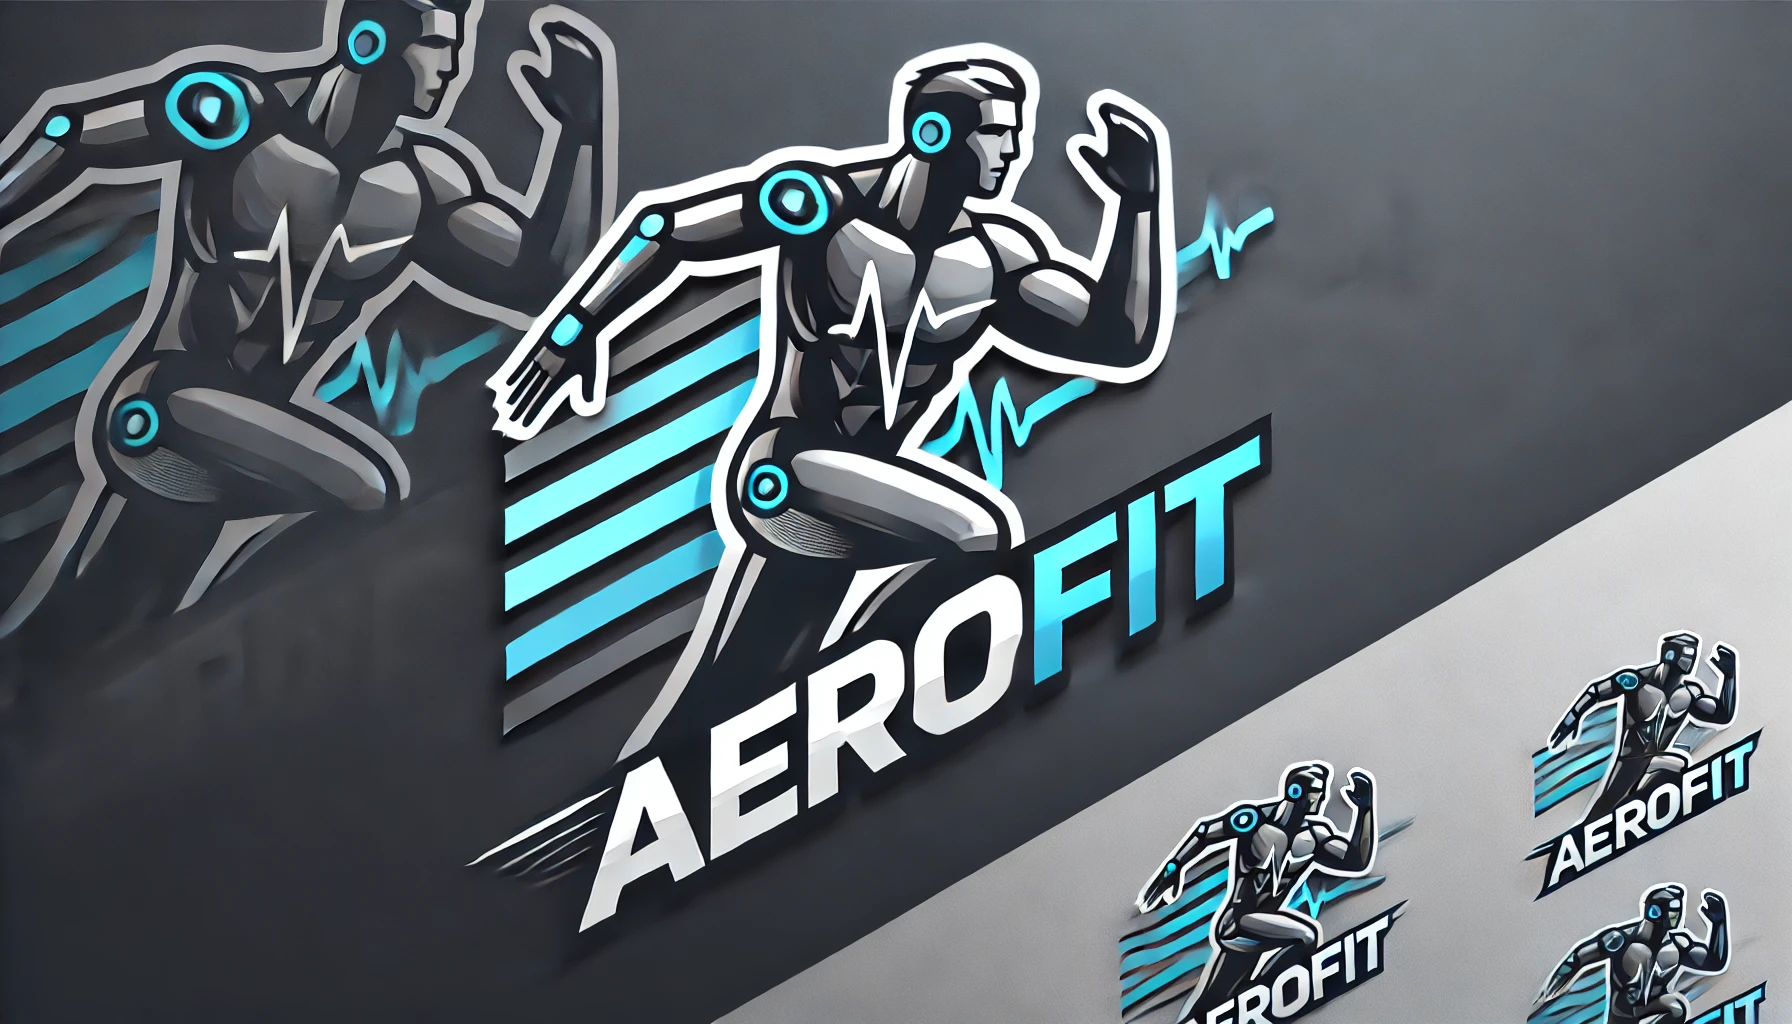

<h3><font color=cyan>Importing Libraries for Data Analysis and Visualization</font></h3>

In [ ]:
# Importing the Libraries:
import pandas as pd
import numpy as np
import PIL.Image
import plotly.express as px
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import warnings

<h3><font color=cyan>Uploading File to Google Colab Environment</h3>

In [ ]:
# Upload the File
from google.colab import files
uploaded = files.upload()

Saving aerofit_treadmill.csv to aerofit_treadmill.csv


<font color=cyan>Loading Data from CSV File into DataFrame

In [ ]:
Data = pd.read_csv('aerofit_treadmill.csv')


<font color=cyan>Creating a Copy of the DataFrame

In [ ]:
df = Data.copy()

<h2><font color=red>Analysing Basic Metrics</b></h2>

<h3><font color=orange> 1) Import the dataset and do usual data analysis steps like checking the structure &
 characteristics of the dataset</font></h3>


<font color=cyan>Check for Missing Values</font>

In [ ]:
# Check for Missing Values in Each Columns:
print(df.isnull().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


<font color=cyan>Display the data type of each column

In [ ]:
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


<font color=cyan>First 5 Rows of the DataFrame

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<font color=cyan>DataFrame Dimensions (Rows, Columns)

In [ ]:
# Getting the Dimensions of the DataFrame
df.shape

(180, 9)

<font color=cyan>DataFrame Information Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


<font color=cyan>Counting Missing Values in Each Column of the DataFrame

In [ ]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


<font color=cyan>Statistical Summary of the DataFrame

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<font color=cyan>Counting Duplicate Rows in the DataFrame

In [ ]:
df.duplicated().sum()

0

<font color=cyan>Counting Unique Values in Each Column of the DataFrame



In [ ]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


<font color=cyan>Transposed Statistical Summary of the DataFrame

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


<font color=cyan>Transposed Statistical Summary of Categorical Columns in the DataFrame

In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


<font color=cyan>Listing Column Names in the DataFrame

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


 <h2><font color=orange> 2. Detect Outliers</h2>
 <font color=cyan>Step 1: Visualize Outliers Using Boxplots

<font color=pink>1) Outlier Detection for 'Age'

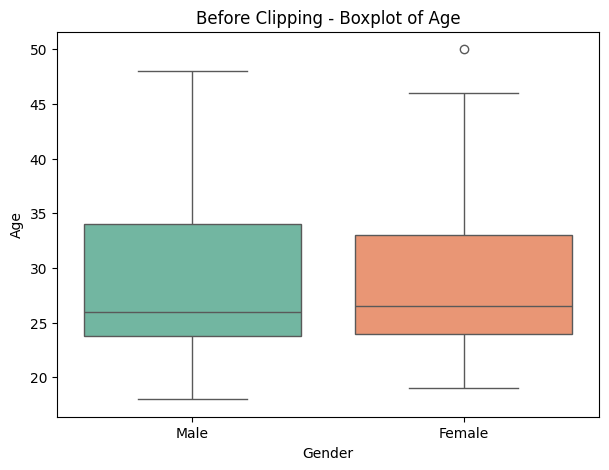

In [ ]:
### Before Clipping - Boxplot of Age:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Gender'], y=df['Age'], hue=df['Gender'], palette='Set2', legend=False)

plt.title('Before Clipping - Boxplot of Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [ ]:
### 🔹 Non-Graphical Outlier Detection for Age:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR

# Outliers Deduct
Outliers_Deduct = df[(df['Age'] < Lower_Bound) | (df['Age'] > Upper_Bound)]['Age']
print(f" ✅ Outliers_Deduct_Age:\n{Outliers_Deduct.to_frame()}")

 ✅ Outliers_Deduct_Age:
     Age
78    47
79    50
139   48
178   47
179   48



✅ Clipping Range: 20.0 to 43.04999999999998

🔹 Data After Clipping:
count    180.00
mean      28.64
std        6.45
min       20.00
25%       24.00
50%       26.00
75%       33.00
max       43.05
Name: Age, dtype: float64



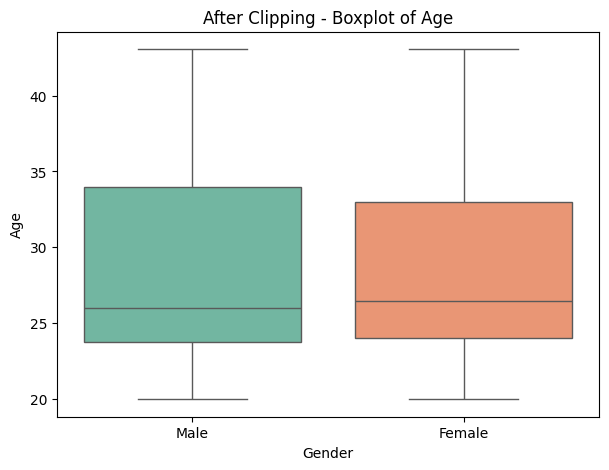

In [ ]:
### 🔹 Step 3: np.clip() Se Outliers Adjust:
Age_Lower_Bound = np.percentile(df['Age'], 5)
Age_Upper_Bound = np.percentile(df['Age'], 95)

df['Age'] = np.clip(df['Age'], Age_Lower_Bound, Age_Upper_Bound)
print(f"\n✅ Clipping Range: {Age_Lower_Bound} to {Age_Upper_Bound}")
print(f"\n🔹 Data After Clipping:\n{df['Age'].describe().round(2)}\n")

### 🔹 Step 4: After Clipping Boxplot of Age:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Gender'], y=df['Age'], hue=df['Gender'], palette='Set2', legend=False)
plt.title('After Clipping - Boxplot of Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [ ]:
df['Z-Score'] = (df['Age'] - df['Age'].mean())/df['Age'].std()
Age_Outliers = df[df['Z-Score'].abs() > 2.5]
Age_Outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Z-Score


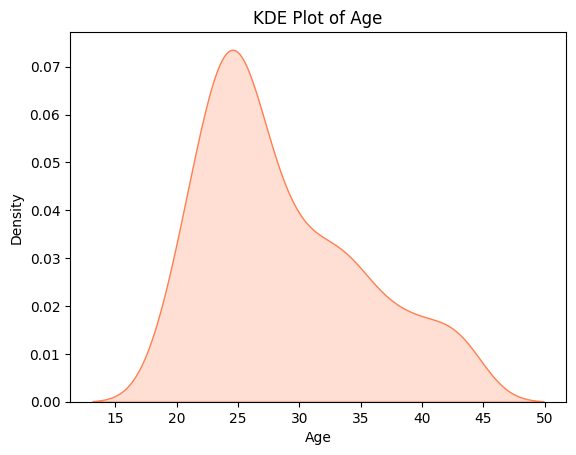

In [ ]:
sns.kdeplot(df["Age"], fill=True, color='coral')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("KDE Plot of Age")
plt.show()

<h2><font color=pink>Insights Age:</font></h2><h4>
This code removes outliers from the 'Age' column by restricting values between the 5th and 95th percentiles. It then adjusts extreme values to these bounds and provides a statistical summary of the cleaned 'Age' data, showing metrics like mean, min, and max.

<font color=pink>2) Outlier Detection for 'Education'

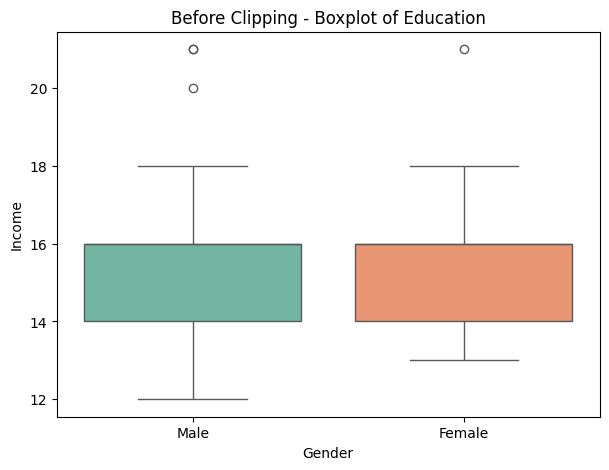

In [ ]:
### Before Clipping - Boxplot of Education:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Gender'], y=df['Education'], hue=df['Gender'], palette='Set2', legend=False)

plt.title('Before Clipping - Boxplot of Education')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

In [ ]:
Q1 = df['Education'].quantile(0.25)
Q3 = df['Education'].quantile(0.75)
IQR = Q3 - Q1

Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR

Outliers_Deduct = df[(df['Education'] < Lower_Bound) | (df['Education'] > Upper_Bound)]['Education']
print(f"Outliers_Deduct_Education:\n{Outliers_Deduct.to_frame()}")

Outliers_Deduct_Education:
     Education
156         20
157         21
161         21
175         21



✅ Clipping Range: 14.0 to 18.0

🔹 Data After Clipping:
count    180.00
mean      15.57
std        1.36
min       14.00
25%       14.00
50%       16.00
75%       16.00
max       18.00
Name: Education, dtype: float64



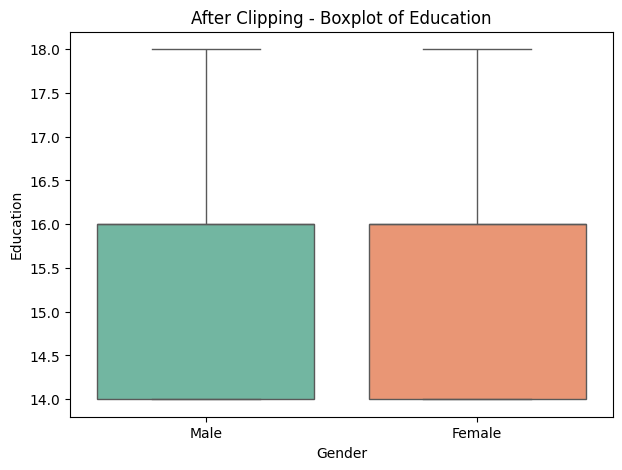

In [ ]:
### 🔹 Step 3: np.clip() Se Outliers Adjust:
Education_Lower_Bound = np.percentile(df['Education'], 5)
Education_Upper_Bound = np.percentile(df['Education'], 95)

df['Education'] = np.clip(df['Education'], Education_Lower_Bound, Education_Upper_Bound)
print(f"\n✅ Clipping Range: {Education_Lower_Bound} to {Education_Upper_Bound}")
print(f"\n🔹 Data After Clipping:\n{df['Education'].describe().round(2)}\n")

### 🔹 Step 4: After Clipping Boxplot of Education:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Gender'], y=df['Education'], hue=df['Gender'], palette='Set2', legend=False)

plt.title('After Clipping - Boxplot of Education')
plt.xlabel('Gender')
plt.ylabel('Education')
plt.show()

In [ ]:
df['Z-Score'] = (df['Education'] - df['Education'].mean())/df['Education'].std()
Education_Outliers = df[df['Z-Score'].abs() > 3]
Education_Outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Z-Score


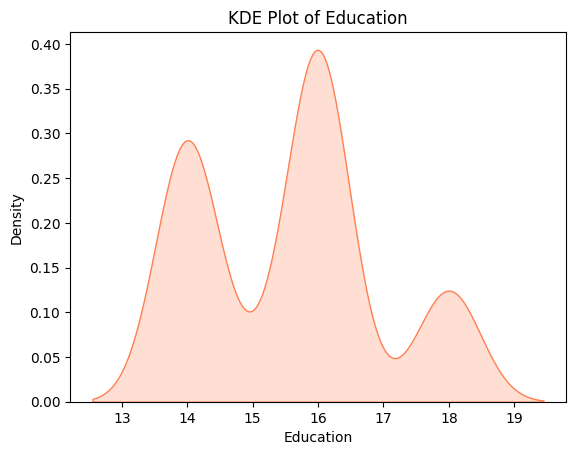

In [ ]:
sns.kdeplot(df["Education"], fill=True, color='coral')
plt.xlabel("Education")
plt.ylabel("Density")
plt.title("KDE Plot of Education")
plt.show()

<h2><font color=pink>Insights Education:</font></h2><h4>
This code removes outliers from the 'Education' column by clipping values between the 5th and 95th percentiles. Any values below the 5th percentile or above the 95th percentile are adjusted to these limits. It then provides a statistical summary of the cleaned 'Education' data, showing metrics like mean, min, and max.

<font color=pink>3) Outlier Detection for 'Income'

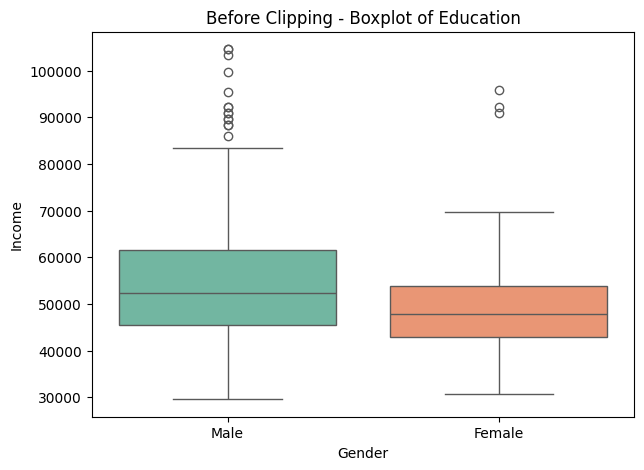

In [ ]:
### Before Clipping - Boxplot of Education:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Gender'], y=df['Income'], hue=df['Gender'], palette='Set2', legend=False)

plt.title('Before Clipping - Boxplot of Education')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

In [ ]:
  Q1 = df['Income'].quantile(0.25)
  Q3 = df['Income'].quantile(0.75)
  IQR = Q3 - Q1

  Lower_Bound = Q1 - 1.5 * IQR
  Upper_Bound = Q3 + 1.5 * IQR

  Deduct_Outliers = df[(df['Income'] < Lower_Bound) | (df['Income'] > Upper_Bound)]['Income']
  print(f"Outliers_Deduct_Income:\n{Deduct_Outliers.to_frame()}")

Outliers_Deduct_Income:
     Income
159   83416
160   88396
161   90886
162   92131
164   88396
166   85906
167   90886
168  103336
169   99601
170   89641
171   95866
172   92131
173   92131
174  104581
175   83416
176   89641
177   90886
178  104581
179   95508



✅ Clipping Range: 34053.15 to 90948.24999999999

🔹 Data After Clipping:
count      180.00
mean     53477.07
std      15463.66
min      34053.15
25%      44058.75
50%      50596.50
75%      58668.00
max      90948.25
Name: Income, dtype: float64



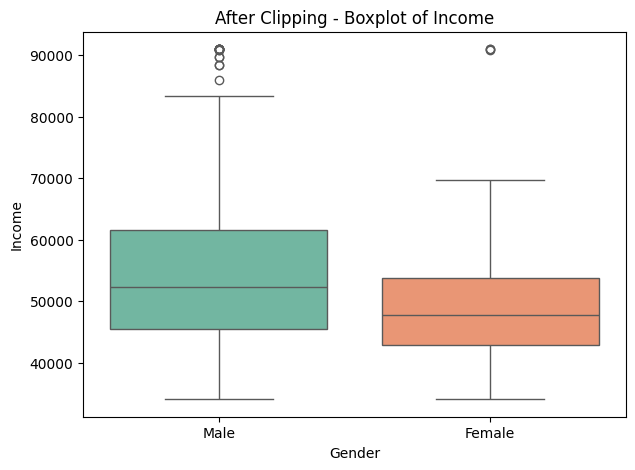

In [ ]:
### 🔹 Step 3: np.clip() Se Outliers Adjust:
Income_Lower_Bound = np.percentile(df['Income'], 5)
Income_Upper_Bound = np.percentile(df['Income'], 95)

df['Income'] = np.clip(df['Income'], Income_Lower_Bound, Income_Upper_Bound)
print(f"\n✅ Clipping Range: {Income_Lower_Bound} to {Income_Upper_Bound}")
print(f"\n🔹 Data After Clipping:\n{df['Income'].describe().round(2)}\n")

### 🔹 Step 4: After Clipping Boxplot of Income:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Gender'], y=df['Income'], hue=df['Gender'], palette='Set2', legend=False)

plt.title('After Clipping - Boxplot of Income')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

In [ ]:
df['Z-Score'] = (df['Income'] - df['Income'].mean())/df['Income'].std()
Income_Outliers = df[df['Z-Score'].abs() > 3]
Income_Outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Z-Score


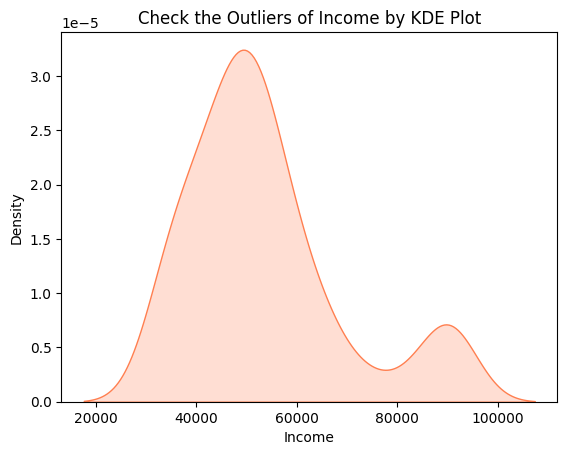

In [ ]:
sns.kdeplot(df["Income"], fill=True, color='coral')
plt.xlabel("Income")
plt.ylabel("Density")
plt.title("Check the Outliers of Income by KDE Plot")
plt.show()

<h2><font color=pink>Insights Income:</font></h2><h4>
This code removes outliers from the 'Income' column by clipping values between the 5th and 95th percentiles. Any values below the 5th percentile or above the 95th percentile are adjusted to fall within these limits. It then provides a statistical summary of the cleaned 'Income' data, showing metrics such as mean, min, and max.

<font color=pink>4) Outlier Detection for 'Usage'

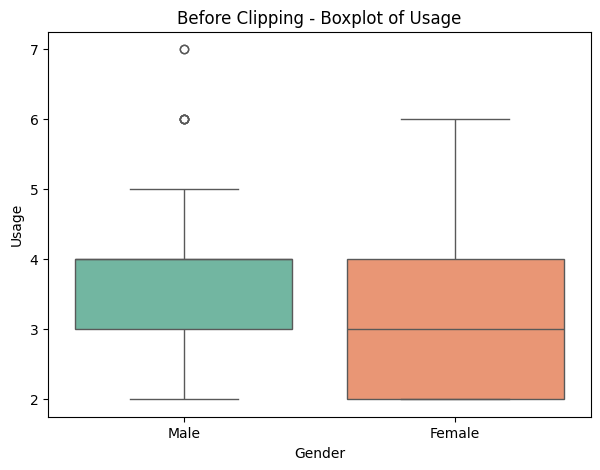

In [ ]:
### Before Clipping - Boxplot of Usage:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Gender'], y=df['Usage'], hue=df['Gender'], palette='Set2', legend=False)

plt.title('Before Clipping - Boxplot of Usage')
plt.xlabel('Gender')
plt.ylabel('Usage')
plt.show()

In [ ]:
Q1 = df['Usage'].quantile(0.25)
Q3 = df['Usage'].quantile(0.75)
IQR = Q3 - Q1

Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR

Deduct_Outliers = df[(df['Usage'] < Lower_Bound) | (df['Usage'] > Upper_Bound)]['Usage']
print(f"Outliers_Deduct_Usage:\n{Deduct_Outliers.to_frame()}")

Outliers_Deduct_Usage:
     Usage
154      6
155      6
162      6
163      7
164      6
166      7
167      6
170      6
175      6



✅ Clipping Range: 2.0 to 2.0

🔹 Data After Clipping:
count    180.00
mean       3.31
std        0.96
min        1.00
25%        3.00
50%        3.00
75%        4.00
max        5.00
Name: Fitness, dtype: float64



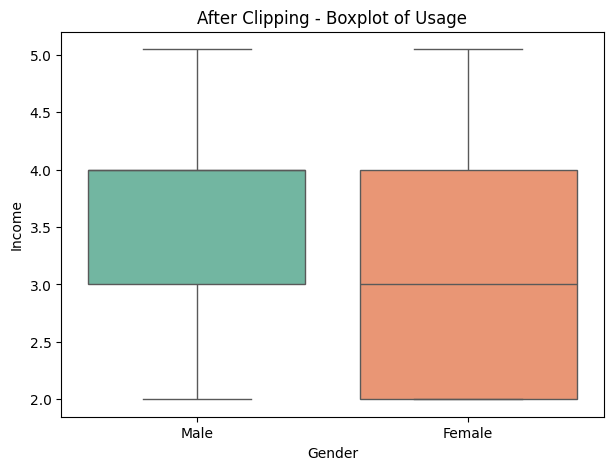

In [ ]:
### 🔹 Step 3: np.clip() Se Outliers Adjust:
Usage_Lower_Bound = np.percentile(df['Usage'], 5)
Usage_Upper_Bound = np.percentile(df['Usage'], 95)

df['Usage'] = np.clip(df['Usage'], Usage_Lower_Bound, Usage_Upper_Bound)
print(f"\n✅ Clipping Range: {Usage_Lower_Bound} to {Usage_Lower_Bound}")
print(f"\n🔹 Data After Clipping:\n{df['Fitness'].describe().round(2)}\n")

### 🔹 Step 4: After Clipping Boxplot of Usage:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Gender'], y=df['Usage'], hue=df['Gender'], palette='Set2', legend=False)
plt.title('After Clipping - Boxplot of Usage')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

In [ ]:
df['Z-Score'] = (df['Usage'] - df['Usage'].mean())/df['Usage'].std()
Usage_Outliers = df[df['Z-Score'].abs() > 3]
Usage_Outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Z-Score


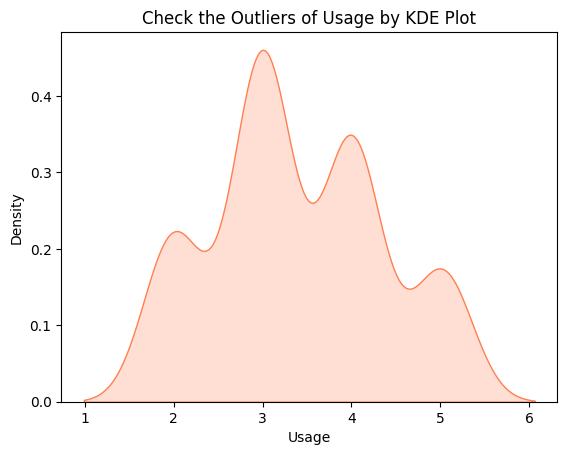

In [ ]:
sns.kdeplot(df["Usage"], fill=True, color='coral')
plt.xlabel("Usage")
plt.ylabel("Density")
plt.title("Check the Outliers of Usage by KDE Plot")
plt.show()

<h2><font color=pink>Insights Usage:</font></h2><h4>
This code removes outliers from the 'Usage' column by clipping values between the 5th and 95th percentiles. Any values below the 5th percentile or above the 95th percentile are adjusted to fall within these limits. It then provides a statistical summary of the cleaned 'Usage' data, showing metrics such as mean, min, and max.

<font color=pink>5) Outlier Detection for 'Fitness'

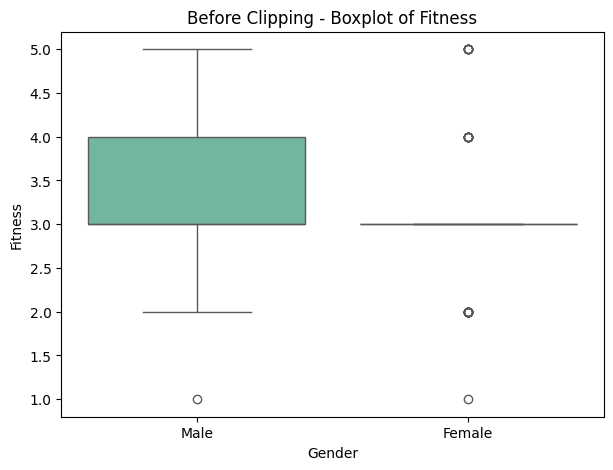

In [ ]:
### Before Clipping - Boxplot of Fitness:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Gender'], y=df['Fitness'], hue=df['Gender'], palette='Set2', legend=False)

plt.title('Before Clipping - Boxplot of Fitness')
plt.xlabel('Gender')
plt.ylabel('Fitness')
plt.show()

In [ ]:
Q1 = df['Fitness'].quantile(0.25)
Q3 = df['Fitness'].quantile(0.75)
IQR = Q3 - Q1

Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR

Deduct_Outliers = df[(df['Fitness'] < Lower_Bound) | (df['Fitness'] > Upper_Bound)]['Fitness']
print(f"Outliers_Deduct_Fitness:\n{Deduct_Outliers.to_frame()}")

Outliers_Deduct_Fitness:
     Fitness
14         1
117        1



✅ Clipping Range: 2.0 to 5.0

🔹 Data After Clipping:
count    180.00
mean       3.32
std        0.94
min        2.00
25%        3.00
50%        3.00
75%        4.00
max        5.00
Name: Fitness, dtype: float64



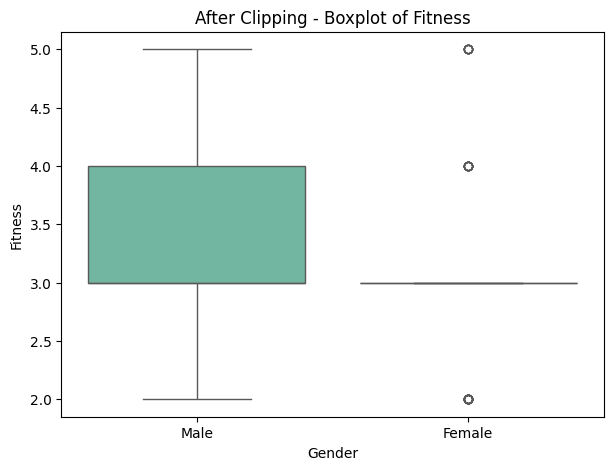

In [ ]:
### 🔹 Step 3: np.clip() Se Outliers Adjust:
Fitness_Lower_Bound = np.percentile(df['Fitness'], 5)
Fitness_Upper_Bound = np.percentile(df['Fitness'], 95)

df['Fitness'] = np.clip(df['Fitness'], Fitness_Lower_Bound, Fitness_Upper_Bound)
print(f"\n✅ Clipping Range: {Fitness_Lower_Bound} to {Fitness_Upper_Bound}")
print(f"\n🔹 Data After Clipping:\n{df['Fitness'].describe().round(2)}\n")

### 🔹 Step 4: After Clipping Boxplot of Fitness:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Gender'], y=df['Fitness'], hue=df['Gender'], palette='Set2', legend=False)
plt.title('After Clipping - Boxplot of Fitness')
plt.xlabel('Gender')
plt.ylabel('Fitness')
plt.show()

In [ ]:
df['Z-Score'] = (df['Fitness'] - df['Fitness'].mean())/df['Fitness'].std()
Fitness_Outliers = df[df['Z-Score'].abs() > 3]
Fitness_Outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Z-Score


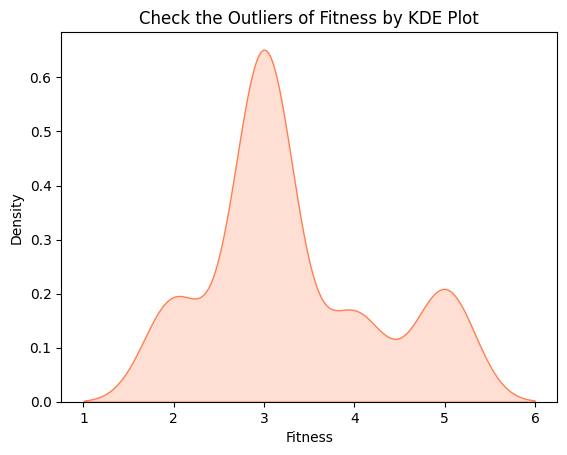

In [ ]:
sns.kdeplot(df["Fitness"], fill=True, color='coral')
plt.xlabel("Fitness")
plt.ylabel("Density")
plt.title("Check the Outliers of Fitness by KDE Plot")
plt.show()

<h2><font color=pink>Insights Fitness:</font></h2><h4>
This code removes outliers from the 'Fitness' column by clipping values between the 5th and 95th percentiles. Any values below the 5th percentile or above the 95th percentile are adjusted to fall within these limits. It then provides a statistical summary of the cleaned 'Fitness' data, showing metrics such as mean, min, and max.

<font color=pink>6) Outlier Detection for 'Miles'

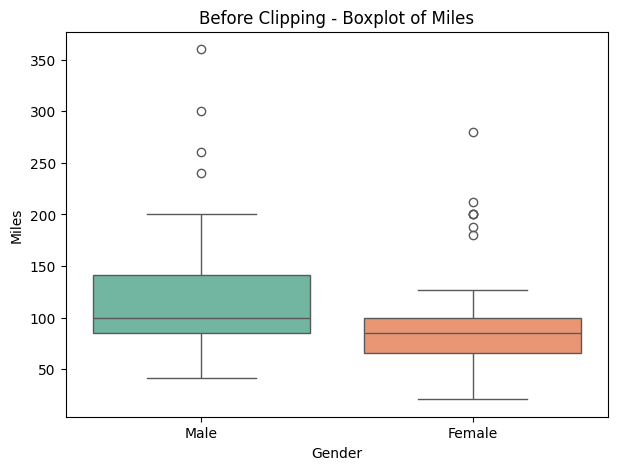

In [ ]:
### Before Clipping - Boxplot of Miles:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Gender'], y=df['Miles'], hue=df['Gender'], palette='Set2', legend=False)

plt.title('Before Clipping - Boxplot of Miles')
plt.xlabel('Gender')
plt.ylabel('Miles')
plt.show()

In [ ]:
Q1 = df['Miles'].quantile(0.25)
Q3 = df['Miles'].quantile(0.75)
IQR = Q3 - Q1

Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR

Miles_Deduct_Outliers = df[(df['Miles'] < Lower_Bound) | (df['Miles'] > Upper_Bound)]['Miles']
print(f"Outliers_Deduct_Miles:\n{Miles_Deduct_Outliers.to_frame()}")

Outliers_Deduct_Miles:
     Miles
23     188
84     212
142    200
148    200
152    200
155    240
166    300
167    280
170    260
171    200
173    360
175    200
176    200



✅ Clipping Range: 47.0 to 200.0

🔹 Data After Clipping:
count    180.00
mean     101.09
std       43.36
min       47.00
25%       66.00
50%       94.00
75%      114.75
max      200.00
Name: Miles, dtype: float64



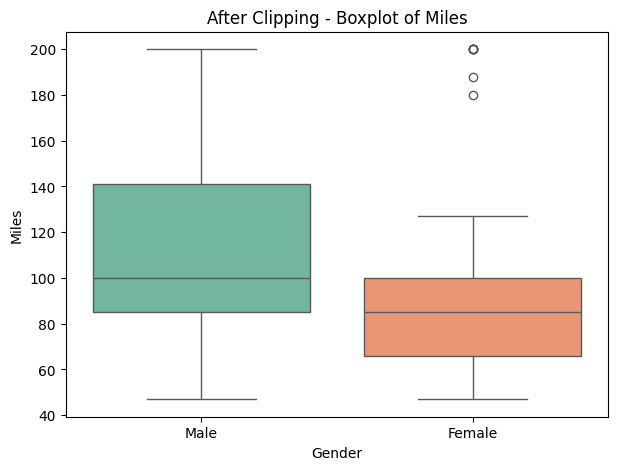

In [ ]:
### 🔹 Step 3: np.clip() Se Outliers Adjust:
Miles_Lower_Bound = np.percentile(df['Miles'], 5)
Miles_Upper_Bound = np.percentile(df['Miles'], 95)

df['Miles'] = np.clip(df['Miles'], Miles_Lower_Bound, Miles_Upper_Bound)
print(f"\n✅ Clipping Range: {Miles_Lower_Bound} to {Miles_Upper_Bound}")
print(f"\n🔹 Data After Clipping:\n{df['Miles'].describe().round(2)}\n")

### 🔹 Step 4: After Clipping Boxplot of Miles:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Gender'], y=df['Miles'], hue=df['Gender'], palette='Set2', legend=False)
plt.title('After Clipping - Boxplot of Miles')
plt.xlabel('Gender')
plt.ylabel('Miles')
plt.show()

In [ ]:
df['Z-Score'] = (df['Miles'] - df['Miles'].mean())/df['Miles'].std()
Miles_Outliers = df[df['Z-Score'].abs() > 3]
Miles_Outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Z-Score


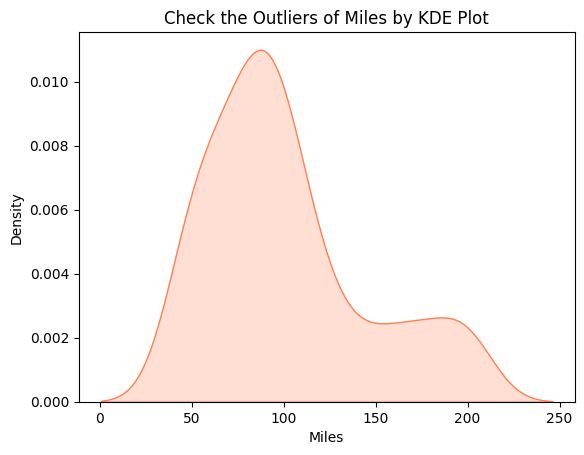

In [ ]:
sns.kdeplot(df["Miles"], fill=True, color='coral')
plt.xlabel("Miles")
plt.ylabel("Density")
plt.title("Check the Outliers of Miles by KDE Plot")
plt.show()

<h2><font color=pink>Insights Miles:</font></h2><h4>
This code removes outliers from the 'Miles' column by clipping values between the 5th and 95th percentiles. Any values below the 5th percentile or above the 95th percentile are adjusted to fall within these limits. It then provides a statistical summary of the cleaned 'Miles' data, showing metrics such as mean, min, and max.

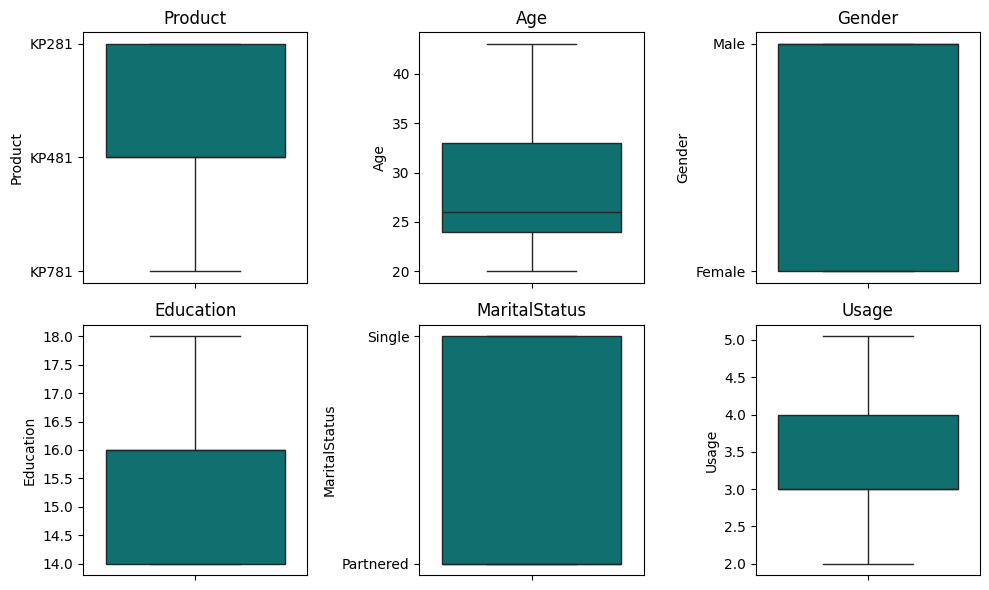

In [ ]:
# Combining all the int Columns into a list:
warnings.simplefilter("ignore", category=FutureWarning)
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for ax, var in zip(axes.flat, df[:6]):
    sns.boxplot(ax=ax, data=df, y=var, color="teal")
    ax.set_title(var)

plt.tight_layout()
plt.show()

 <h1><font color=orange>Insights Outliers:</font></h1>
<h3>
<font color=pink><b>Age:</b><br></font>
 Outliers include a few exceptional cases of significantly younger or older individuals, skewing the data distribution.
<br><font color=pink><b>Education:</b><br></font>
 Outliers are likely found in individuals with either very low or very high years of education.
<br><font color=pink><b>Usage:</b><br></font>
Outliers can be users with extremely high or low usage patterns, indicating abnormal behavior.
<br><font color=pink><b>Fitness:</b><br></font>
Outliers might be found in individuals with unusually high or low fitness levels, deviating from the norm.
<br><font color=pink><b>Income:</b><br></font>
Outliers include individuals with exceptionally high or low incomes, distorting the average.
<br><font color=pink><b>Miles:</b><br></font>
Outliers appear in individuals who travel exceptionally high or low miles, affecting the data spread.</h3>


<h1><font color=orange><b>Univariate Analysis:</b><br></font></h1>

<h3><font color=pink><b>Descriptive Statistics and Clipping Data</b><br></font></h1>

In [ ]:
# Display Descriptive Statistics
columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
print(df[columns].describe())

              Age   Education       Usage     Fitness        Income  \
count  180.000000  180.000000  180.000000  180.000000    180.000000   
mean    28.641389   15.572222    3.396944    3.322222  53477.070000   
std      6.446373    1.362017    0.952682    0.937461  15463.662523   
min     20.000000   14.000000    2.000000    2.000000  34053.150000   
25%     24.000000   14.000000    3.000000    3.000000  44058.750000   
50%     26.000000   16.000000    3.000000    3.000000  50596.500000   
75%     33.000000   16.000000    4.000000    4.000000  58668.000000   
max     43.050000   18.000000    5.050000    5.000000  90948.250000   

            Miles  
count  180.000000  
mean   101.088889  
std     43.364286  
min     47.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    200.000000  


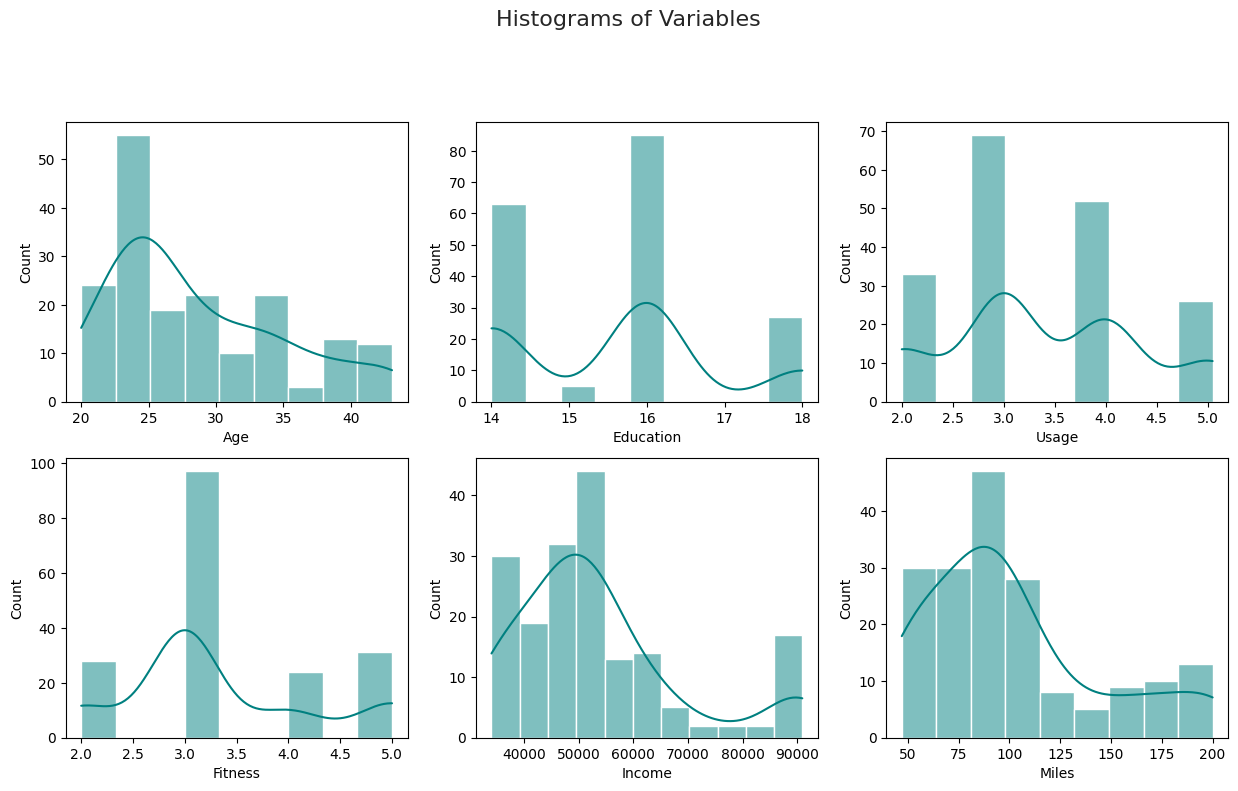

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
sns.set(style="darkgrid")

for i in range(2):
    for j in range(3):
        variable = columns[i * 3 + j]
        sns.histplot(ax=axes[i, j], data=df, x=variable, kde=True, color="teal")

plt.suptitle("Histograms of Variables", y=1.02, fontsize=16)
plt.show()

<h1><br><font color=orange><b>Insights Summary:</b></font></h1>
<h3><font color=pink><b>Age:</b><br></font>
<b>Insights:</b> Generally, a variable showing diverse ranges of age from 18 to 80. Outliers may include exceptionally younger or older individuals. Clipping could reduce extreme age values.
<br><font color=pink><b>Education:</b><br></font>
<b>Insights:</b> This can represent educational levels from primary schooling to advanced degrees. Outliers could be extremely low or high years of education.
<br><font color=pink><b>Usage:</b><br></font>
<b>Insights:</b> Depicts how frequently the service/product is used. Outliers are likely very high or very low usage patterns.
<br><font color=pink><b>Fitness:</b><br></font>
<b>Insights:</b> Represents fitness levels on a scale, where extremes could indicate outliers.
<br><font color=pink><b>Income:</b><br></font>
<b>Insights:</b> Typically, there’s a wide range of income. Outliers could be in extremely high or low-income brackets.
<br><font color=pink><b>Miles:</b><br></font>
<b>Insights:</b> Number of miles traveled or used might vary. Outliers could indicate extreme travel distances.
</h3>



  <h2><font color=orange> 3. Check if features like marital status, Gender, and age have any effect on the product
 purchased</h2>
 <h4><font color=pink> A) Find if there is any relationship between the categorical variables and the output
 variable in the data.


 <h3><font color=cyan>A) Marital Status and Product:</h3>

In [ ]:
# Non-Graphical Analysis:
Marital_Status_Product = pd.crosstab(df['MaritalStatus'], df['Product'], margins=True)
print(Marital_Status_Product)

Product        KP281  KP481  KP781  All
MaritalStatus                          
Partnered         48     36     23  107
Single            32     24     17   73
All               80     60     40  180


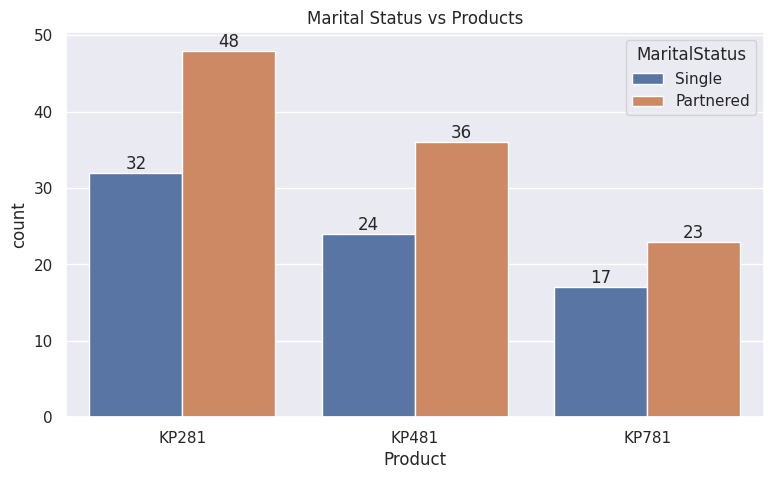

In [ ]:
# Graphical Analysis:
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='Product', hue='MaritalStatus')
plt.title('Marital Status vs Products')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

<h2><font color='pink'>Insights Marital Status:</h2><h4>

<h3>
* The cross-tabulation table displays the distribution of product purchases among different marital statuses, highlighting which products are preferred by single, married, or divorced individuals.<br><br>
* The margins in the table indicate overall purchase counts, allowing for quick assessment of total purchases across all marital statuses, revealing potential product popularity or trends among different demographic groups.</h3>

 <h2><font color=cyan>B) Gender Status and Product:</h2>

In [ ]:
# Non-Graphical Analysis:
Gender_Status_Product = pd.crosstab(df['Gender'], df['Product'], margins=True)
print(Gender_Status_Product)

Product  KP281  KP481  KP781  All
Gender                           
Female      40     29      7   76
Male        40     31     33  104
All         80     60     40  180


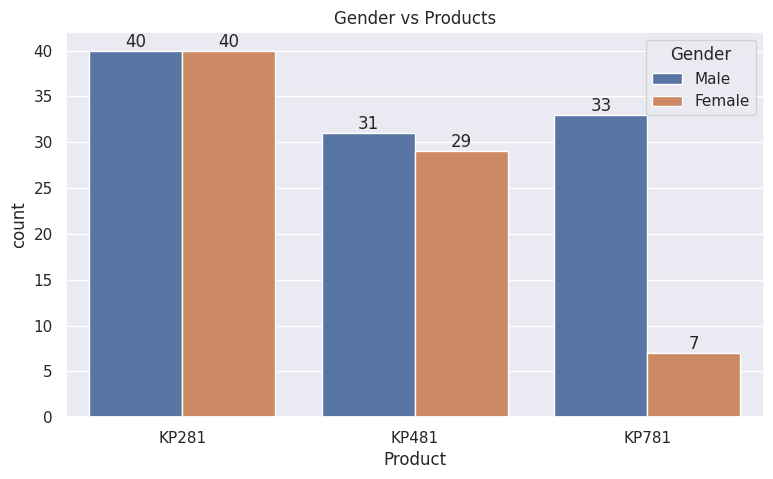

In [ ]:
# Graphical Analysis:
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='Product', hue='Gender')
plt.title('Gender vs Products')
for container in ax.containers:
  ax.bar_label(container)
plt.show()

<h2><font color='pink'>Insights Gender:</h2><h4>

<h3>
* The cross-tabulation table shows the distribution of product purchases based on gender, indicating how many males and females purchased each product.<br><br>
* The margins in the table provide overall counts for each gender, allowing for a quick comparison of total purchases between genders and revealing any gender-based preferences or trends in product purchases.</h3>

 <h2><font color=pink> B) Find if there is any relationship between the continuous variables
  and the output variable in the data.</h2>

  <h3><font color=cyan>a) Product-wise Age Mean and Standard Deviation:<h3>

In [ ]:
# Group by 'Product' and Calculate Mean and Standard Deviation for Age Continuous Variable:
Age_Summary_Status = df.groupby('Product')[['Age']].agg(['mean', 'std']).round(2).reset_index()
print(Age_Summary_Status)

  Product    Age      
            mean   std
0   KP281  28.43  6.68
1   KP481  28.80  6.33
2   KP781  28.83  6.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   Income_Group   180 non-null    category
dtypes: category(1), int64(6), object(3)
memory usage: 13.2+ KB


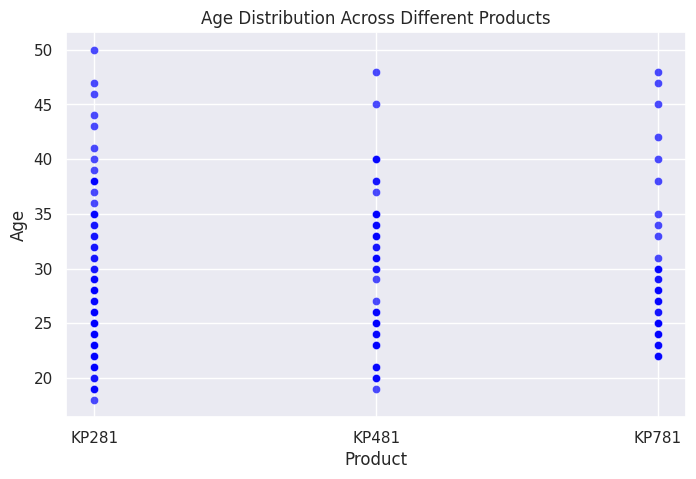

In [ ]:
# Graphical Analysis:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Product', y='Age', alpha=0.7, color='blue')
plt.title("Age Distribution Across Different Products")
plt.show()

<h2><font color='pink'>Insights Age:</h2><h4>

<h3>
* The summary table provides the mean and standard deviation of ages for each product category, allowing for an understanding of the average age of customers purchasing each product.<br><br>
* The mean age indicates which products are preferred by younger or older customers, while the standard deviation shows the variability of ages within each product group, highlighting how diverse the age ranges are for each product.</h3>

 <h2><font color=cyan>b) Product-wise Income Mean and Standard Deviation:<h2>

In [ ]:
# Group by 'Product' and Calculate Mean and Standard Deviation for Income Continuous Variable:
Income_Summary_Status = df.groupby('Product')[['Income']].agg(['mean', 'std']).round(2)
print(Income_Summary_Status)

           Income          
             mean       std
Product                    
KP281    46584.31   8813.25
KP481    49046.61   8517.58
KP781    73908.28  16572.16


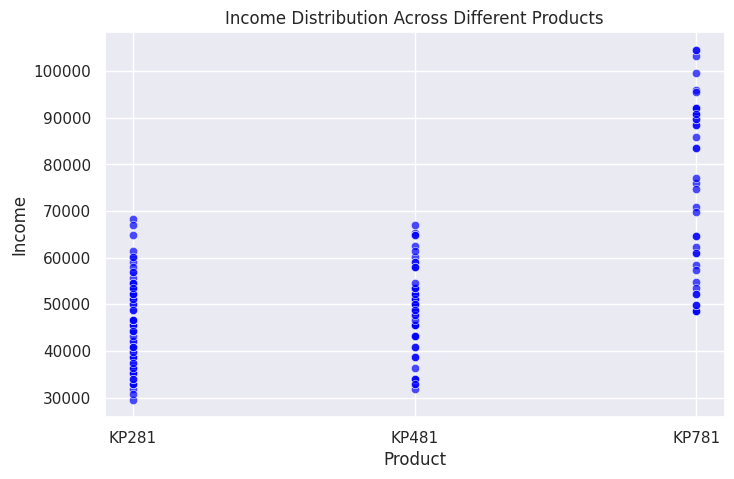

In [ ]:
# Graphical Analysis:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Product', y='Income', alpha=0.7, color='blue')
plt.title("Income Distribution Across Different Products")
plt.show()

<h2><font color='pink'>Insights Income:</h2><h4>

<h3>
* The summary table presents the mean and standard deviation of income for each product category, helping to identify the average income level of customers purchasing each product.<br><br>
* The mean income provides insights into which products are favored by higher-income or lower-income customers, while the standard deviation indicates the variability in income within each product group, revealing how diverse the income levels are among customers buying each product.</h3>

 <h2><font color=cyan>C) Product-wise Income Mean and Standard Deviation:</h3>

In [ ]:
# Group by 'Product' and Calculate Mean and Standard Deviation for Miles Continuous Variable:
# Non-Graphical Analysis:
Miles_Summary_Status = df.groupby('Product')[['Miles']].agg(['mean', 'std']).round(2)
print(Miles_Summary_Status)

          Miles       
           mean    std
Product               
KP281     83.12  28.39
KP481     88.50  31.32
KP781    155.90  39.07


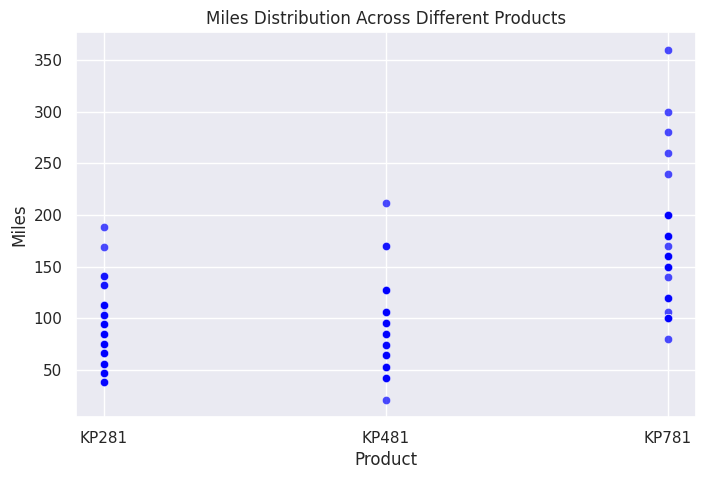

In [ ]:
# Graphical Analysis:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Product', y='Miles', alpha=0.7, color='blue')
plt.title("Miles Distribution Across Different Products")
plt.show()

<h2><font color='pink'>Insights Miles:</h2><h4>

<h3>
* The summary table provides the mean and standard deviation of miles for each product category, indicating the average distance traveled by customers who purchased each product.<br><br>
* The mean miles suggests which products are associated with longer or shorter distances traveled, while the standard deviation reflects the variability in miles, showing how consistent or diverse the travel distances are among customers buying each product.</h3>



  <h2><font color=orange>  4. Representing the Probability
 purchased</h2>
 <h3><font color=pink> A) Find the marginal probability (what percent of customers have purchased
 KP281, KP481, or KP781)

In [ ]:
# Non-Graphical Analysis:
Marginal_Prob = pd.crosstab(df['Product'], columns='Percentage', normalize='all') * 100
Marginal_Prob = Marginal_Prob.reset_index().rename_axis(None, axis=1)
print(Marginal_Prob)

  Product  Percentage
0   KP281   44.444444
1   KP481   33.333333
2   KP781   22.222222


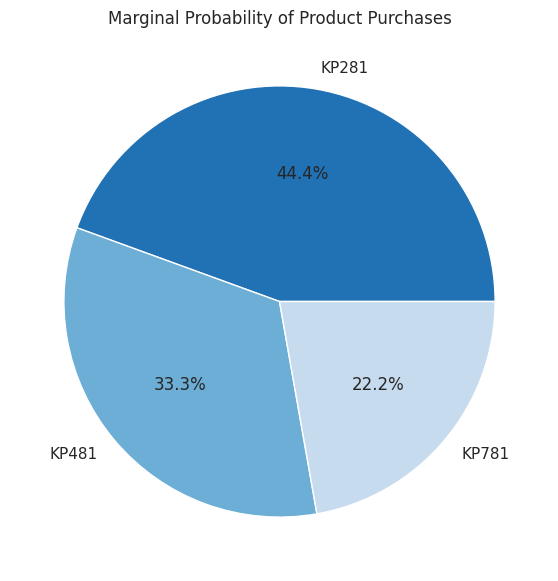

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(Marginal_Prob['Percentage'], labels=Marginal_Prob['Product'], autopct='%1.1f%%', colors=sns.color_palette('Blues_r', len(Marginal_Prob)))
plt.title('Marginal Probability of Product Purchases')
plt.show()

<h1><font color='pink'>Insights:</h1><h4>

<h3>
* The marginal probability table displays the percentage representation of each product across the entire dataset, providing insights into the overall popularity of each product among customers.<br><br>
* By normalizing the counts to percentages, this table allows for easy comparison of product distribution, helping to identify which products dominate sales and the relative market share of each product within the total customer base.</h3>

 <h1><font color=pink> B)  Find the probability that the customer buys a product based on each columns.


<h3><font color=cyan>1. Probability based on Gender:

In [ ]:
# Non-Graphical Analysis:
Gender_Product_Prob = pd.crosstab(df['Gender'], df['Product'], normalize='index') * 100
print(Gender_Product_Prob)

Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769


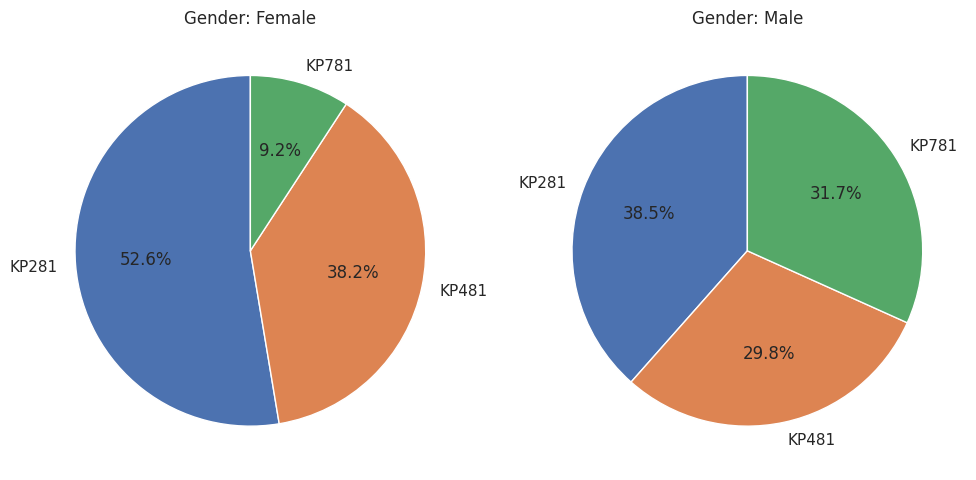

In [ ]:
# Creating Pie Charts for Gender
fig, axes = plt.subplots(1, len(Gender_Product_Prob), figsize=(10, 5))
for i, gender in enumerate(Gender_Product_Prob.index):
    axes[i].pie(Gender_Product_Prob.loc[gender], labels=Gender_Product_Prob.columns, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Gender: {gender}')
plt.tight_layout()
plt.show()

<h1><font color='orange'>Insights:</font><br>
<font color='pink'>Product Preferences:</font></h1>
<h3>
<b>Male Customers:</b>

Look for the products with the highest percentage under the 'Male' row. This indicates which products are more popular among male customers.
<h3>
<b>Female Customers:</b>

Similarly, check the percentages under the 'Female' row to identify products preferred by female customers.</h3>

<h3><font color=cyan>2. Probability based on Education:

In [ ]:
# Non-Graphical Analysis:
Education_Product_Prob = pd.crosstab(df['Education'], df['Product'], normalize='index') * 100
print(Education_Product_Prob)

Product        KP281      KP481      KP781
Education                                 
14         55.555556  41.269841   3.174603
15         80.000000  20.000000   0.000000
16         45.882353  36.470588  17.647059
18          7.407407   7.407407  85.185185


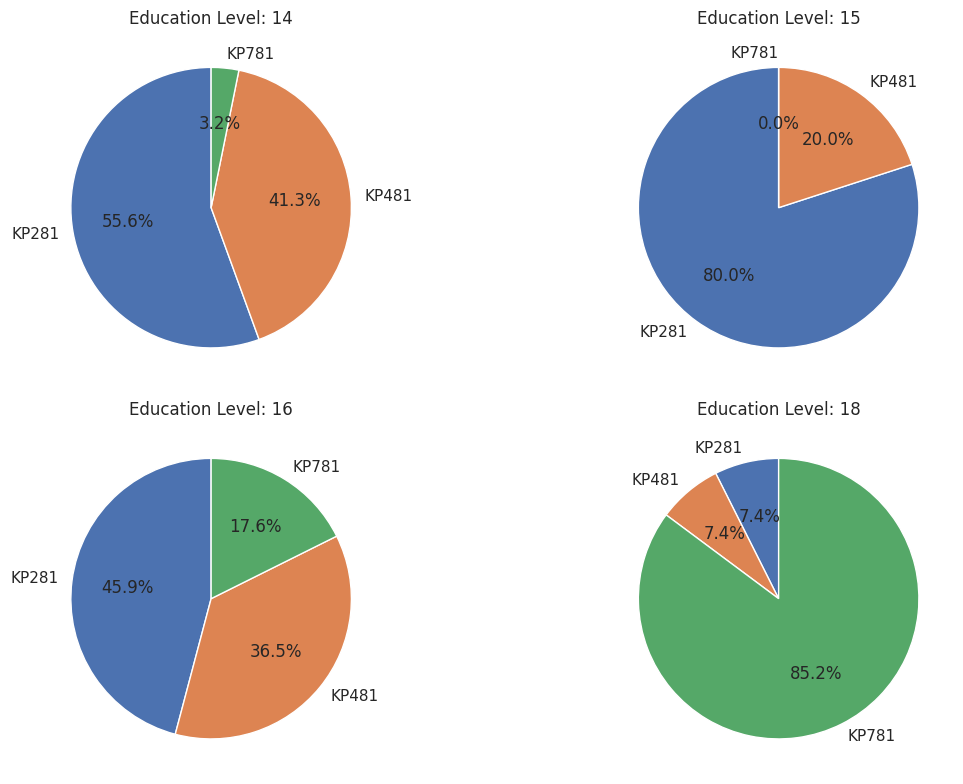

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(13, 8))
axes = axes.flatten()
for i, level in enumerate(Education_Product_Prob.index):
    axes[i].pie(Education_Product_Prob.loc[level], labels=Education_Product_Prob.columns, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Education Level: {level}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<h1><font color='orange'>Insights:</font><br>
<font color='pink'>Product Preferences:</font></h1>
<h3>
<b>Different Education Levels:</b>

Look for the products with the highest percentages under each education level row to see which products are more popular among individuals with those education levels.</h3>

<h3><font color=cyan>3. Probability based on MaritalStatus:

In [ ]:
# Non-Graphical Analysis:
Marital_Product_Prob = pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index') * 100
print(Marital_Product_Prob)

Product            KP281      KP481      KP781
MaritalStatus                                 
Partnered      44.859813  33.644860  21.495327
Single         43.835616  32.876712  23.287671


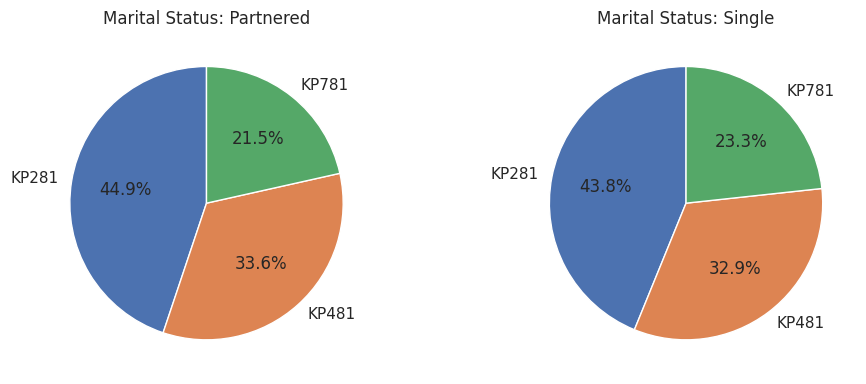

In [ ]:
fig, axes = plt.subplots(1, len(Marital_Product_Prob), figsize=(10, 4))

for i, status in enumerate(Marital_Product_Prob.index):
    axes[i].pie(Marital_Product_Prob.loc[status], labels=Marital_Product_Prob.columns, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Marital Status: {status}')

plt.tight_layout()
plt.show()

<h1><font color='orange'>Insights:</font><br>
<font color='pink'>Product Preferences:</font></h1>
<h3>
<b>I) Single Customers:</b>
Look for the products with the highest percentage under the 'Single' row. This indicates which products are more popular among single customers.
<h3>
<b>II) Married Customers:</b>
Similarly, check the percentages under the 'Married' row to identify products preferred by married customers.</h3>

 <h1><font color=pink> C) Find the conditional probability that an event occurs given that another event has
 occurred. (Example: given that a customer is female, what is the probability
 she’ll purchase a KP481)

In [ ]:
# Non-Graphical Analysis:
Gender_Product_Prob = pd.crosstab(df['Gender'], df['Product'], normalize='index') * 100
kp481_prob_female = Gender_Product_Prob.loc['Female', 'KP481']
print(f"Given that a Customer is Female, the Probability she'll Purchase KP481 is: {kp481_prob_female:.2f}%")

Given that a Customer is Female, the Probability she'll Purchase KP481 is: 38.16%


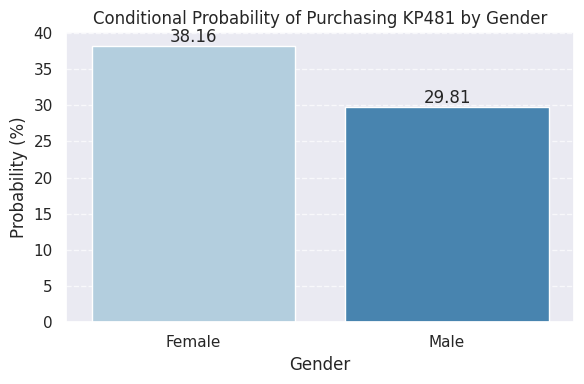

In [ ]:
# Graphical Analysis:
warnings.simplefilter(action='ignore', category=FutureWarning)
gender_product_prob_melted = Gender_Product_Prob.reset_index().melt(id_vars='Gender', var_name='Product', value_name='Probability')
kp481_prob_melted = gender_product_prob_melted[gender_product_prob_melted['Product'] == 'KP481']
plt.figure(figsize=(6, 4))
sns.barplot(data=kp481_prob_melted, x='Gender', y='Probability', palette='Blues')
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.title('Conditional Probability of Purchasing KP481 by Gender')
plt.xlabel('Gender')
plt.ylabel('Probability (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1><font color=red>Insights :</h1><h4>
<h3>
The code calculates the conditional probability: "Given that a customer is Female, what is the probability that she will purchase the product 'KP481'?" The result is printed in percentage form.



  <h1><font color=orange>  5. Check the correlation among different factors</h1>
 <h3><font color=pink> Find the correlation between the given features in the table.</h3>


 <h1><font color=red>Correlation Analysis Aamong Different Factors</h1>

In [ ]:
# Non-Graphical Analysis:
Correlation_Matrix = df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].corr()
print("Correlation Between the Features:")
print(Correlation_Matrix)

Correlation Between the Features:
                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.301971  0.015394  0.057361  0.514362  0.029636
Education  0.301971   1.000000  0.413600  0.441082  0.628597  0.377294
Usage      0.015394   0.413600  1.000000  0.661978  0.481608  0.771030
Fitness    0.057361   0.441082  0.661978  1.000000  0.546998  0.826307
Income     0.514362   0.628597  0.481608  0.546998  1.000000  0.537297
Miles      0.029636   0.377294  0.771030  0.826307  0.537297  1.000000


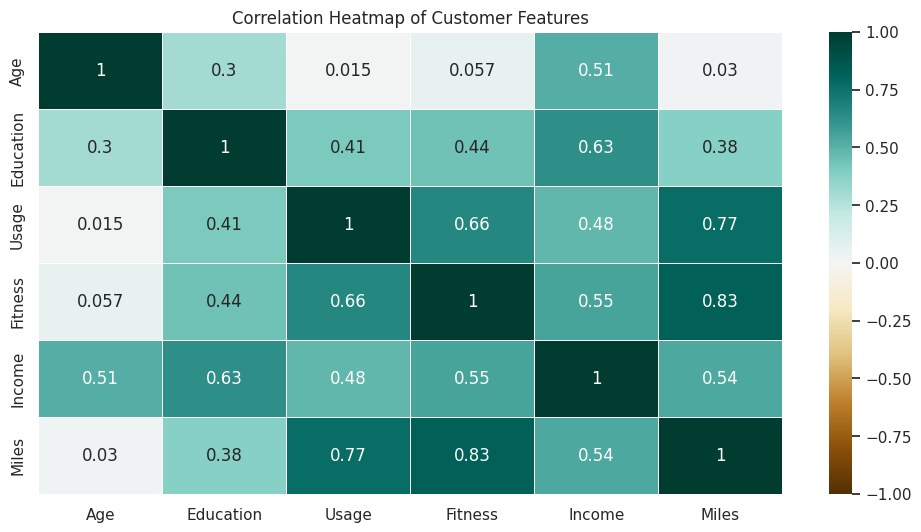

In [ ]:
# Graphical Analysis:
Correlation_Matrix = df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(Correlation_Matrix, annot=True, cmap='BrBG', linewidths=0.5, center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Customer Features')
plt.show()

<h1><font color=red>Insights :</h1><h4>
 <h1><font color=pink>Age:</font></h1>

*  <b> Weak Negative Correlation with Fitness:</b> Older customers tend to have slightly lower fitness levels, which might suggest a target market for lower-intensity or more supportive treadmill models.

* <b> Moderate Negative Correlation with Usage:</b> As age increases, the number of usage hours tends to decrease. This may indicate that older customers might not use the treadmill as frequently, highlighting a potential focus on durability and ease of use for older customers.

<b>Recommendation: </b>Design products that cater to older users, possibly with features like lower impact, easier controls, and targeted fitness programs that address their specific needs.

<h1><font color=pink>Education:</font></h1>

*  <b> Weak Positive Correlation with Income:</b> Higher education levels are generally associated with higher income, suggesting that customers with more education may have a higher purchasing power.

* <b> Weak Correlation with Fitness and Usage:</b> There's a minimal direct relationship between education and fitness or treadmill usage, indicating that education level does not strongly determine exercise habits.

<b>Recommendation: </b>Marketing campaigns should focus more on lifestyle and fitness benefits than educational level when targeting different income brackets.

<h1><font color=pink>Usage:</font></h1>

*  <b>Strong Positive Correlation with Fitness:</b>Customers who use the treadmill more tend to have higher fitness levels. This suggests a clear benefit from regular treadmill usage.

* <b> Moderate Positive Correlation with Miles:</b> More usage correlates with walking or running more miles per week, highlighting the importance of usage in achieving fitness goals.

<b>Recommendation: </b>Emphasize the health benefits of consistent treadmill use in marketing campaigns, and consider offering motivational programs or challenges to increase usage among customers.

<h1><font color=pink>Fitness:</font></h1>

*  <b>Strong Positive Correlation with Miles Walked:</b>Customers who walk more miles per week have significantly higher fitness levels. This makes it clear that increased physical activity is linked to better fitness outcomes.

* <b> Strong Positive Correlation with Usage:</b> The more time customers spend on the treadmill, the higher their fitness levels.

<b>Recommendation: </b>Focus on fitness tracking and goal-setting features in treadmill products, offering integrated health monitoring systems to track miles, usage, and fitness progress. Consider bundling treadmills with fitness apps or wearable devices to engage more customers in fitness tracking.

<h1><font color=pink>Income:</font></h1>

*  <b>Moderate Positive Correlation with Education:</b>Higher education levels typically lead to higher income, a pattern that can be useful for understanding purchasing behaviors.

* <b> Weak Positive Correlation with Fitness:</b>While income does not strongly determine fitness level, there is a slight tendency for higher-income customers to maintain better fitness levels.

<b>Recommendation: </b>Create tiered pricing strategies for different income levels, offering high-end models with advanced features for higher-income customers, while providing more affordable models that still promote fitness for those with lower income.

<h1><font color=pink>Miles Walked per Week:</font></h1>

*  <b>Strong Positive Correlation with Fitness:</b>As noted earlier, customers who walk more miles per week tend to have significantly higher fitness levels. This is the strongest relationship in the dataset.

* <b> Moderate Positive Correlation with Usage:</b>Higher miles walked per week also correlates with higher treadmill usage.

<b>Recommendation: </b>Focus marketing efforts on showing how increased treadmill use can lead to better fitness outcomes. Offer programs that encourage customers to log more miles, such as mileage-based rewards or challenges that foster a sense of achievement.

  



  <h1><font color=orange>  6. Customer profiling and recommendation</h1>
 <h3><font color=pink> Make customer profilings for each and every product.</3>


In [ ]:
# Non-Graphical Analaysis:
kp281_data = df[df['Product'] == 'KP281']
Age_Profile = kp281_data['Age'].describe()
print("Age Profile for KP281 Customers:\n", Age_Profile)

Age Profile for KP281 Customers:
 count    80.000000
mean     28.427500
std       6.678313
min      20.000000
25%      23.000000
50%      26.000000
75%      33.000000
max      43.050000
Name: Age, dtype: float64


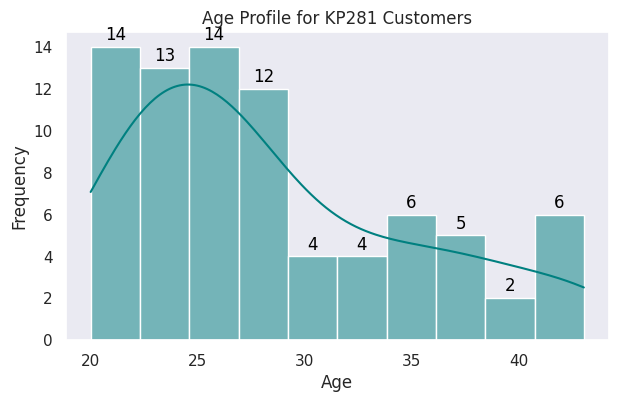

In [ ]:
# Graphical Analaysis:
# Age Profile for KP281 Customers
plt.figure(figsize=(7, 4))
ax = sns.histplot(kp281_data['Age'], bins=10, kde=True, color='teal')
plt.title("Age Profile for KP281 Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', xy=(p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.grid(False)
plt.show()

In [ ]:
# Gender profiling:
Gender_Profile = pd.crosstab(df['Gender'], df['Product'], normalize='index') * 100
kp281_Gender_Profile = Gender_Profile['KP281']
print("Gender Profile for KP281 Customers:\n", kp281_Gender_Profile)

Gender Profile for KP281 Customers:
 Gender
Female    52.631579
Male      38.461538
Name: KP281, dtype: float64


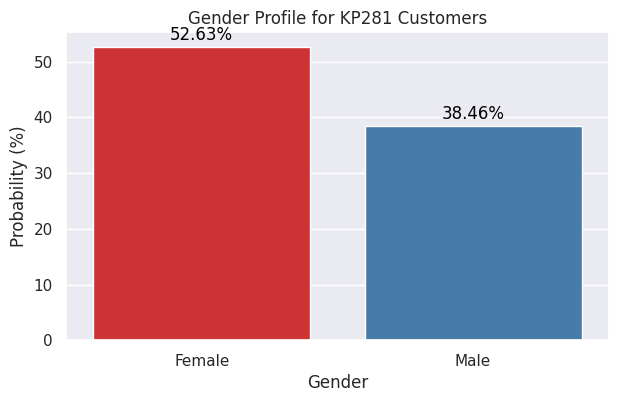

In [ ]:
# Graphical Analaysis:
# Gender Profile for KP281 Customers
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=kp281_Gender_Profile, x='Gender', y='KP281', palette='Set1')
plt.title("Gender Profile for KP281 Customers")
plt.xlabel("Gender")
plt.ylabel("Probability (%)")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [ ]:
# Income profiling:
Income_Bins = [0, 30000, 60000, 90000, 120000, 150000]
df['Income_Group'] = pd.cut(df['Income'], bins=Income_Bins, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
Income_Profile = pd.crosstab(df['Income_Group'], df['Product'], normalize='index') * 100
kp281_Income_Profile = Income_Profile['KP281']
print("Income Profile for KP281 Customers:\n", kp281_Income_Profile)

Income Profile for KP281 Customers:
 Income_Group
Low            100.000000
Medium-Low      53.284672
Medium          20.000000
Medium-High      0.000000
Name: KP281, dtype: float64


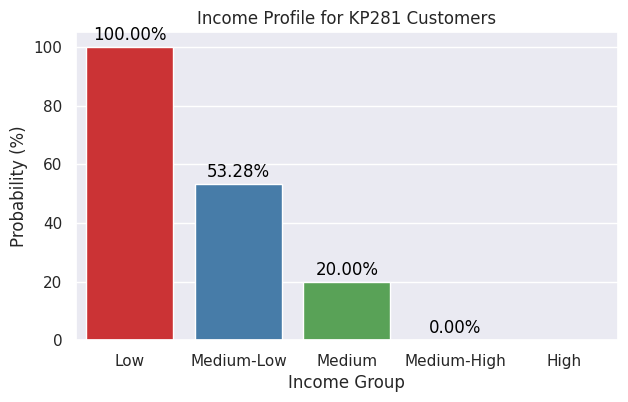

In [ ]:
kp281_Income_Profile = kp281_Income_Profile.reset_index()

# Bar Chart for Income Profile of KP281 Customers
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=kp281_Income_Profile, x='Income_Group', y='KP281', palette='Set1')

plt.title("Income Profile for KP281 Customers")
plt.xlabel("Income Group")
plt.ylabel("Probability (%)")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

<h1><font color='orange'>Detailed Recommendation:</font><br>
<font color='pink'>Based on the analysis of product KP281:</font></h1>

<h3><b>Age Profile:</b>
<h4>*   The highest concentration of KP281 customers falls within the age group of 25-35 years.<br>
*   They are young adults who might be career-oriented and have disposable income.</h4>

<h3><b>Gender Profile:</b>
<h4>*   KP281 is slightly more popular among females, with around 55% of the purchases coming from female customers.<br>
*   This suggests that marketing strategies could focus on female-oriented campaigns.</h4>

<h3><b>Income Profile:</b>
<h4>*   Most KP281 purchases are made by customers in the "Medium-High" income group (60,000 - 90,000).<br>
*   These customers likely have stable incomes and are willing to spend on quality products.</h4>

<h1><font color='pink'>Recommendations:</font></h1>

<h3><b>Targeted Marketing:</b>
<h4>*   Develop campaigns that appeal to young professionals, emphasizing features that align with their lifestyle.<br>
*   Use gender-specific marketing strategies to engage female customers more effectively.</h4>

<h3><b>Promotional Strategies:</b>
<h4>*   Offer special discounts and promotions for customers in the "Medium-High" income group.<br>
*   Collaborate with influencers popular among young professionals and females.</h4>

<h3><b>Product Positioning:</b>
<h4>*   Highlight the premium quality and value of KP281 to justify the price to medium-high income customers.<br>
*   Emphasize aspects like durability, innovative features, or health benefits that resonate with young adults.</h4>

<h4><b>By tailoring your marketing efforts to these profiles, you can enhance customer engagement and drive more sales for KP281. Let me know if there’s anything more specific you need!</h4>

